# Clustering jerárquico

Los llamados métodos jerárquicos tienen como objetivo agrupar clusters para crear uno nuevo, o bien separar uno existente. 

* Aglomerativos: tenemos tantos clusters como puntos. Unimos clusters hasta que todos los puntos quedan englobados en un único cluster
* Disociativos: proceso inverso, comenzamos con un único cluster y realizamos divisiones.

## Método aglomerativo

Iremos aglutinando puntos en base a una cierta distancia.

## Métodos de enlace
### Enlace simple

La distancia entre dos clusters es el mínimo de las distancias entre cualquiera dos puntos del cluster I y el cluster II.

Dos cluster con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = min(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace completo

La distancia entre dos clusters es el **máximo** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = max(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace promedio

La distancia entre dos clusters es el **promedio** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = \sum \frac{d(x_i, y_j)}{n} \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace completo

La distancia entre dos clusters es el **máximo** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = max(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace del centroide

La distancia entre dos clusters es el **centroide** ( punto medio) de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = d(\widehat{C_m}, \widehat{C_n})
$$

### Enlace de Ward

Un cluster que minimiza el incremento del error combinado en la suma de los cuadradosde las varianzas se une a un cluster ya existente para formar uno nuevo.

Los clusters minimizan la varianza dentro de los puntos del mismo y en el dataset global

$$
min \sum_{i=1}^{k}\sum_{x_i \in C_i}(x_i - c_j)^2
$$

El incremento más pequeño del término de error de la varianza prueba que los nuevos elementos unidos a los clúster son más similares a dicho clúster que a otros ya existentes en otros clusters.

## Clustering jerárquico

Método aglomerativo donde cada punto empieza siendo un único cluster y en cada paso los vamos juntando hasta tener un único cluster basado en las similitudes entre observaciones.

* Empezamos con cada observación en un cluster
* Encontramos la menor distancia en la matriz de distancias y unimos las dos observaciones en un nuevo cluster
* Recalculamos las distancias entre los clusters antiguos y el nuevo reción creado con alguno de los métodos de enlace vistos.
* Repetimos los pasos hasta que solo quede un cluster con las N observaciones.

In [1]:
# bibliotecas standars
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas específicas
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from scipy.spatial import distance_matrix

In [2]:
# datos
iris = datasets.load_iris()

In [3]:
# Valores del target
target = np.where(iris.target == 0, iris.target_names[0], iris.target)
target = np.where(iris.target == 1, iris.target_names[1], target)
target = np.where(iris.target == 2, iris.target_names[2], target)
np.unique(target)

array(['setosa', 'versicolor', 'virginica'], dtype='<U21')

In [4]:
# Dataframe
df = pd.DataFrame(data=np.c_[iris.data, target],
                  columns=iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Array de datos
X = iris.data
y = iris.target

In [16]:
pd.plotting.scatter_matrix(df, c = y, figsize=[8,8],
                           s= 150, marker='D')
plt.show()

NameError: name 'y' is not defined

## Clusters

In [8]:
Z = linkage(df.drop(['target'], axis=1), "ward")
Z.shape

(149, 4)

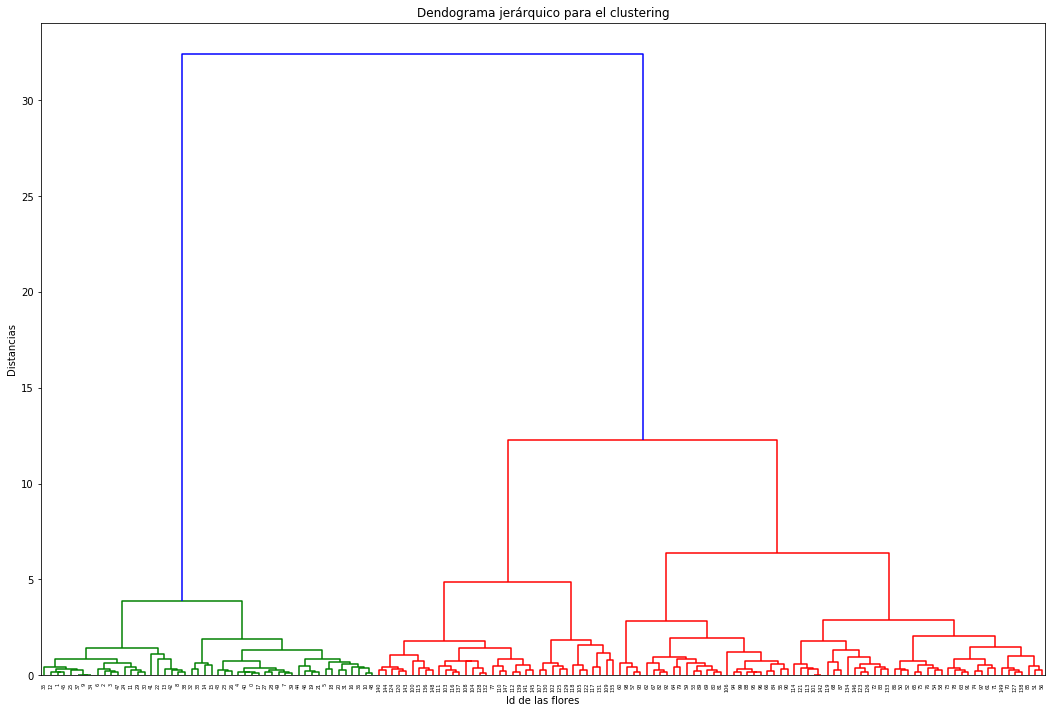

In [15]:
plt.figure(figsize=(18, 12))
plt.title("Dendograma jerárquico para el clustering")
plt.xlabel("Id de las flores")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90.)
plt.show()

In [9]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)